In [5]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [6]:
json_file = "A-pex/01-apex-data.json"
j = json.load(open(json_file))

In [7]:
df = pd.json_normalize(j["data"])
df

,map-id,source,target,algorithm,front,norm-front,d-score,norm-d-score,sparsity,time
0,resources/dao-map/ost004d.map,4274,937,Apex,"[[50, 50.414, 467, 117.5, 175.5], [50, 50.414,...","[[0, 0, 0.904762, 0.934066, 0], [0, 0, 0.90476...","[517.433, 461.348, 448.782, 452.742, 540.14, 4...","[1.30041, 0.911403, 1.14286, 1.01081, 1.06837,...",26.78400,25
1,resources/dao-map/ost004d.map,3111,3309,Apex,"[[54, 54.828, 526, 106.5, 242], [54, 54.828, 5...","[[0, 0, 0.910979, 0.326923, 0.666667], [0, 0, ...","[593.721, 619.053, 554.762, 559.303, 552.995, ...","[1.17525, 1.22145, 1.06094, 1.04836, 1.09102, ...",19.42260,23
2,resources/dao-map/ost004d.map,3366,4402,Apex,"[[23, 30.038, 166, 51.5, 112], [23, 30.038, 16...","[[0, 0, 0.901639, 0.918919, 0], [0, 0, 0.90163...","[210.199, 209.877, 211.541, 206.814, 205.699, ...","[1.28739, 1.04128, 1, 0.905026, 1.25967, 0.818...",76.15020,23
3,resources/dao-map/ost004d.map,4151,4286,Apex,"[[28, 32.968, 256, 59, 134.5], [28, 32.968, 25...","[[0, 0, 0.833333, 0.586207, 0.256098], [0, 0, ...","[298.292, 306.73, 305.83, 315.522, 279.524, 27...","[1.05056, 1.00737, 1.09644, 1.058, 0.920078, 0...",16.64390,23
4,resources/dao-map/ost004d.map,3615,497,Apex,"[[45, 62.802, 401, 127, 179], [45, 62.802, 401...","[[0, 0, 0.725738, 0.538043, 0], [0, 0, 0.72573...","[463.616, 464.499, 467.848, 490.162, 512.159, ...","[0.903431, 0.829986, 0.819027, 0.906096, 1.002...",4.34104,23
...,...,...,...,...,...,...,...,...,...,...
2221,resources/dao-map/lak100d.map,38376,36140,Apex,"[[199, 218.458, 1795, 460, 791.5], [199, 218.4...","[[0, 0, 0.107477, 0.666667, 0.631579], [0, 0, ...","[2036.52, 2040.8, 2039.04, 2056.32, 2061.66, 2...","[0.924601, 0.882352, 1.0087, 0.745737, 0.71990...",6.46825,387
2222,resources/dao-map/lak100d.map,4500,11873,Apex,"[[104, 141.26, 872, 224, 424.5], [104, 141.26,...","[[0, 0, 0.631737, 0.8, 0.194444], [0, 0, 0.631...","[1010.71, 1019.25, 1025.89, 1021.02, 1026.52, ...","[1.03774, 0.986704, 1.21029, 0.870572, 1.13447...",1.76869,371
2223,resources/dao-map/lak100d.map,15863,6372,Apex,"[[193, 240.61, 1371, 374.5, 739.5], [193, 240....","[[1, 1, 0.0498221, 0.6, 0.428571], [1, 1, 0.04...","[1631.53, 1631.51, 1648.72, 1638.06, 1655.45, ...","[1.59567, 1.58217, 1.53793, 1.56266, 1.50774, ...",24.25960,361
2224,resources/dao-map/lak100d.map,23394,651,Apex,"[[265, 312.196, 2053, 550.5, 996], [265, 312.1...","[[0, 0, 0.0221402, 0.384615, 0.342857], [0, 0,...","[2382.76, 2384.27, 2384.74, 2393.58, 2408.27, ...","[0.515723, 0.462155, 0.575377, 0.421911, 0.543...",14.97130,366


In [8]:
fronts = df["front"].tolist()

In [9]:
#front must be a 2d matrix (
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [10]:
hypervolumns = []
for front in fronts:
    hypervolumns.append(front_hv(front))

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [11]:
df.insert(9, "hypervolumn", hypervolumns, True)

In [12]:
df

,map-id,source,target,algorithm,front,norm-front,d-score,norm-d-score,sparsity,hypervolumn,time
0,resources/dao-map/ost004d.map,4274,937,Apex,"[[50, 50.414, 467, 117.5, 175.5], [50, 50.414,...","[[0, 0, 0.904762, 0.934066, 0], [0, 0, 0.90476...","[517.433, 461.348, 448.782, 452.742, 540.14, 4...","[1.30041, 0.911403, 1.14286, 1.01081, 1.06837,...",26.78400,1.695504e+10,25
1,resources/dao-map/ost004d.map,3111,3309,Apex,"[[54, 54.828, 526, 106.5, 242], [54, 54.828, 5...","[[0, 0, 0.910979, 0.326923, 0.666667], [0, 0, ...","[593.721, 619.053, 554.762, 559.303, 552.995, ...","[1.17525, 1.22145, 1.06094, 1.04836, 1.09102, ...",19.42260,3.112855e+10,23
2,resources/dao-map/ost004d.map,3366,4402,Apex,"[[23, 30.038, 166, 51.5, 112], [23, 30.038, 16...","[[0, 0, 0.901639, 0.918919, 0], [0, 0, 0.90163...","[210.199, 209.877, 211.541, 206.814, 205.699, ...","[1.28739, 1.04128, 1, 0.905026, 1.25967, 0.818...",76.15020,1.208045e+09,23
3,resources/dao-map/ost004d.map,4151,4286,Apex,"[[28, 32.968, 256, 59, 134.5], [28, 32.968, 25...","[[0, 0, 0.833333, 0.586207, 0.256098], [0, 0, ...","[298.292, 306.73, 305.83, 315.522, 279.524, 27...","[1.05056, 1.00737, 1.09644, 1.058, 0.920078, 0...",16.64390,2.717930e+09,23
4,resources/dao-map/ost004d.map,3615,497,Apex,"[[45, 62.802, 401, 127, 179], [45, 62.802, 401...","[[0, 0, 0.725738, 0.538043, 0], [0, 0, 0.72573...","[463.616, 464.499, 467.848, 490.162, 512.159, ...","[0.903431, 0.829986, 0.819027, 0.906096, 1.002...",4.34104,6.745612e+10,23
...,...,...,...,...,...,...,...,...,...,...,...
2221,resources/dao-map/lak100d.map,38376,36140,Apex,"[[199, 218.458, 1795, 460, 791.5], [199, 218.4...","[[0, 0, 0.107477, 0.666667, 0.631579], [0, 0, ...","[2036.52, 2040.8, 2039.04, 2056.32, 2061.66, 2...","[0.924601, 0.882352, 1.0087, 0.745737, 0.71990...",6.46825,2.674990e+13,387
2222,resources/dao-map/lak100d.map,4500,11873,Apex,"[[104, 141.26, 872, 224, 424.5], [104, 141.26,...","[[0, 0, 0.631737, 0.8, 0.194444], [0, 0, 0.631...","[1010.71, 1019.25, 1025.89, 1021.02, 1026.52, ...","[1.03774, 0.986704, 1.21029, 0.870572, 1.13447...",1.76869,1.038971e+12,371
2223,resources/dao-map/lak100d.map,15863,6372,Apex,"[[193, 240.61, 1371, 374.5, 739.5], [193, 240....","[[1, 1, 0.0498221, 0.6, 0.428571], [1, 1, 0.04...","[1631.53, 1631.51, 1648.72, 1638.06, 1655.45, ...","[1.59567, 1.58217, 1.53793, 1.56266, 1.50774, ...",24.25960,1.704915e+13,361
2224,resources/dao-map/lak100d.map,23394,651,Apex,"[[265, 312.196, 2053, 550.5, 996], [265, 312.1...","[[0, 0, 0.0221402, 0.384615, 0.342857], [0, 0,...","[2382.76, 2384.27, 2384.74, 2393.58, 2408.27, ...","[0.515723, 0.462155, 0.575377, 0.421911, 0.543...",14.97130,9.773150e+13,366


In [13]:
# d-score
d_scores = df["d-score"].tolist()
norm_d_scores = df["norm-d-score"].tolist()

In [14]:
avg_d_score = []
avg_norm_d_score = []
for inst in d_scores:
    avg_d_score.append(sum(inst) / len(inst))

for inst in norm_d_scores:
    avg_norm_d_score.append(sum(inst) / len(inst))

In [15]:
df.insert(8, "avg_norm_d_score", avg_norm_d_score, True)
df.insert(7, "avg_d_score", avg_d_score, True)

In [16]:
df

,map-id,source,target,algorithm,front,norm-front,d-score,avg_d_score,norm-d-score,avg_norm_d_score,sparsity,hypervolumn,time
0,resources/dao-map/ost004d.map,4274,937,Apex,"[[50, 50.414, 467, 117.5, 175.5], [50, 50.414,...","[[0, 0, 0.904762, 0.934066, 0], [0, 0, 0.90476...","[517.433, 461.348, 448.782, 452.742, 540.14, 4...",343.903409,"[1.30041, 0.911403, 1.14286, 1.01081, 1.06837,...",0.834025,26.78400,1.695504e+10,25
1,resources/dao-map/ost004d.map,3111,3309,Apex,"[[54, 54.828, 526, 106.5, 242], [54, 54.828, 5...","[[0, 0, 0.910979, 0.326923, 0.666667], [0, 0, ...","[593.721, 619.053, 554.762, 559.303, 552.995, ...",387.775210,"[1.17525, 1.22145, 1.06094, 1.04836, 1.09102, ...",0.910484,19.42260,3.112855e+10,23
2,resources/dao-map/ost004d.map,3366,4402,Apex,"[[23, 30.038, 166, 51.5, 112], [23, 30.038, 16...","[[0, 0, 0.901639, 0.918919, 0], [0, 0, 0.90163...","[210.199, 209.877, 211.541, 206.814, 205.699, ...",198.676154,"[1.28739, 1.04128, 1, 0.905026, 1.25967, 0.818...",1.006965,76.15020,1.208045e+09,23
3,resources/dao-map/ost004d.map,4151,4286,Apex,"[[28, 32.968, 256, 59, 134.5], [28, 32.968, 25...","[[0, 0, 0.833333, 0.586207, 0.256098], [0, 0, ...","[298.292, 306.73, 305.83, 315.522, 279.524, 27...",249.617964,"[1.05056, 1.00737, 1.09644, 1.058, 0.920078, 0...",0.883020,16.64390,2.717930e+09,23
4,resources/dao-map/ost004d.map,3615,497,Apex,"[[45, 62.802, 401, 127, 179], [45, 62.802, 401...","[[0, 0, 0.725738, 0.538043, 0], [0, 0, 0.72573...","[463.616, 464.499, 467.848, 490.162, 512.159, ...",402.150239,"[0.903431, 0.829986, 0.819027, 0.906096, 1.002...",0.966700,4.34104,6.745612e+10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,resources/dao-map/lak100d.map,38376,36140,Apex,"[[199, 218.458, 1795, 460, 791.5], [199, 218.4...","[[0, 0, 0.107477, 0.666667, 0.631579], [0, 0, ...","[2036.52, 2040.8, 2039.04, 2056.32, 2061.66, 2...",2078.604427,"[0.924601, 0.882352, 1.0087, 0.745737, 0.71990...",0.976008,6.46825,2.674990e+13,387
2222,resources/dao-map/lak100d.map,4500,11873,Apex,"[[104, 141.26, 872, 224, 424.5], [104, 141.26,...","[[0, 0, 0.631737, 0.8, 0.194444], [0, 0, 0.631...","[1010.71, 1019.25, 1025.89, 1021.02, 1026.52, ...",929.273544,"[1.03774, 0.986704, 1.21029, 0.870572, 1.13447...",1.056216,1.76869,1.038971e+12,371
2223,resources/dao-map/lak100d.map,15863,6372,Apex,"[[193, 240.61, 1371, 374.5, 739.5], [193, 240....","[[1, 1, 0.0498221, 0.6, 0.428571], [1, 1, 0.04...","[1631.53, 1631.51, 1648.72, 1638.06, 1655.45, ...",1699.924783,"[1.59567, 1.58217, 1.53793, 1.56266, 1.50774, ...",1.524730,24.25960,1.704915e+13,361
2224,resources/dao-map/lak100d.map,23394,651,Apex,"[[265, 312.196, 2053, 550.5, 996], [265, 312.1...","[[0, 0, 0.0221402, 0.384615, 0.342857], [0, 0,...","[2382.76, 2384.27, 2384.74, 2393.58, 2408.27, ...",2467.431266,"[0.515723, 0.462155, 0.575377, 0.421911, 0.543...",0.656588,14.97130,9.773150e+13,366


In [17]:
#
# Sparisty
#

In [18]:
avg_map_sparsity = []
maps = df["map-id"].unique()
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["sparsity"])
    avg_map_sparsity.extend(map_df.mean(axis=0).tolist())

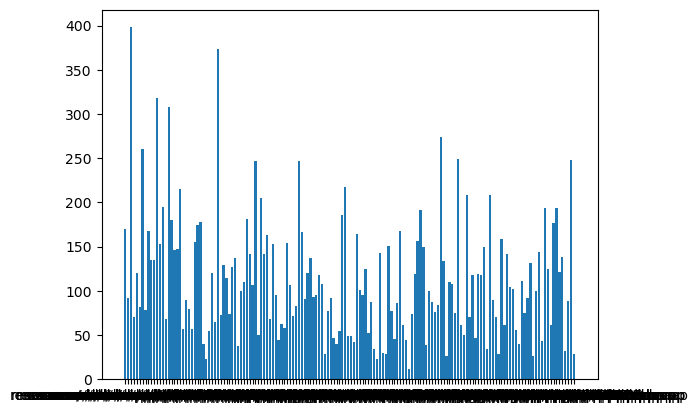

In [18]:
plt.bar(maps, avg_map_sparsity)
plt.show()

In [38]:
#overall sparsity
s_df = df.filter(["sparsity"])
overall_sparsity = s_df.mean(axis=0)
print("Sparsity:")
print("map avg min: ", min(avg_map_sparsity))
print("map avg max: ", max(avg_map_sparsity))
print("map avg    : ", np.array(avg_map_sparsity).mean())
print("overall avg: ", overall_sparsity[0])

Sparsity:
map avg min:  3.5372475333333333
map avg max:  164.79837266666664
map avg    :  21.370710166717792
overall avg:  21.819947549415993


/var/folders/sz/10t46yj57l72d9m15rn_xnt80000gn/T/ipykernel_52255/2526844777.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("overall avg: ", overall_sparsity[0])


In [20]:
#
# Hypervolume
# 

In [21]:
# front must be a 2d matrix (?)
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [23]:
def map_avg_HV(df):
    map_avg_HV = []
    maps = df['map-id'].unique()
    for MAP in maps:
        map_df = df[df['map-id'] == MAP]
        fronts = map_df.filter(["front"])
        HVs = []
        for index, row in fronts.iterrows():
            HVs.append(front_hv(row.tolist()[0]))
            
        map_avg_HV.append(np.array(HVs).mean())
        
    return map_avg_HV

In [24]:
# calculate the overall average generational hypervolume
HVs = []
fronts = df.filter(["front"])
for index, row in fronts.iterrows():
    HVs.append(front_hv(row.tolist()[0]))

overall_HV = np.array(HVs).mean()
overall_HV

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


126312878037716.27

In [25]:
map_HV = map_avg_HV(df)

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [35]:
print("hypervolume:")
print("map HV avg min: ", min(map_HV))
print("map HV avg max: ", max(map_HV))
print("overall HV avg: ", overall_HV)

hypervolume:
map HV avg min:  29655959.305400003
map HV avg max:  4858255212212103.0
overall HV avg:  126312878037716.27


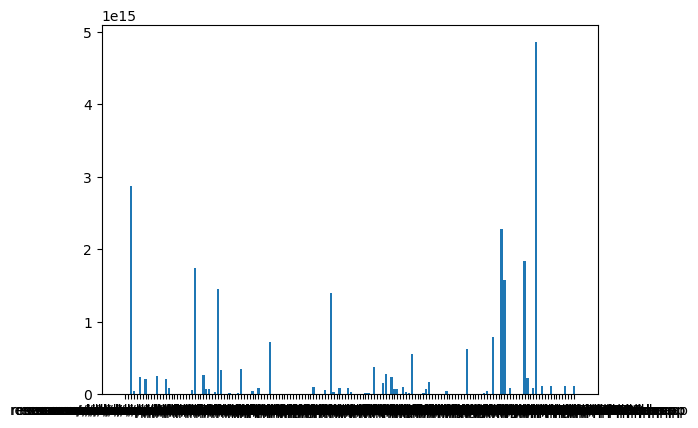

In [28]:
plt.bar(maps, map_HV)
plt.show()

In [27]:
#
# Run time
#

In [19]:
run_times = df["time"].tolist()

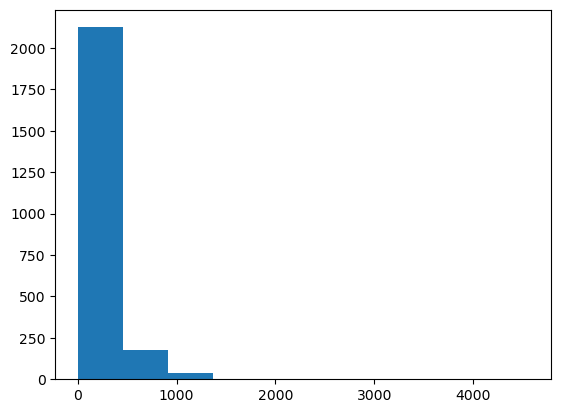

In [29]:
plt.hist(run_times)
plt.show()
#bad data?